In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_val_score

/home/kumail/anaconda3/envs/AliHaq/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Kedzierski Dataset

In [2]:
Kedzierski = pd.read_csv("/home/kumail/Energy_AI/Micro Palstic/Dataset/Kedzierski et Dataset.csv")
Kedzierski = Kedzierski.drop(columns=['Nom '])
Kedzierski

,Interpretation,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,3980.55703,...,617.14062,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354
0,Animal fibre like,-0.040366,-0.135578,-0.221583,-0.178677,-0.062108,0.036045,0.097367,0.140272,0.127931,...,4.588121,4.054936,3.972936,3.872520,3.164385,1.876155,0.578717,-0.018923,0.009571,0.047273
1,Cellulose acetate,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,-0.030605,...,2.623865,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218
2,Cellulose acetate,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,-0.010152,...,1.134722,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628
3,Cellulose acetate,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,-0.012137,...,6.068466,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635
4,Cellulose acetate,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,-0.005042,...,3.276646,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Unknown,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,0.161963,...,3.505148,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117
966,Unknown,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,0.136215,...,-2.542803,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533
967,Unknown,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,0.000017,...,0.920250,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747
968,Unknown,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,0.013787,...,1.465810,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723


In [3]:
interpretation_counts = Kedzierski['Interpretation '].value_counts()
interpretation_counts

Interpretation 
Poly(ethylene)               228
Poly(propylene)              195
Poly(ethylene) + fouling     148
Poly(styrene)                 66
Morphotype 1                  55
Cellulose acetate             54
Ethylene propylene rubber     49
Poly(propylene) like          48
PEVA                          43
Poly(ethylene) like           25
Poly(amide)                   21
Cellulose like                16
Morphotype 2                  11
Unknown                        5
PMMA                           3
Poly(urethane)                 1
Poly(vinylchloride)            1
Animal fibre like              1
Name: count, dtype: int64

In [4]:
values_to_remove = ['PMMA', 'Poly(urethane)', 'Poly(vinylchloride)', 'Animal fibre like']
Kedzierski = Kedzierski[~Kedzierski['Interpretation '].isin(values_to_remove)]
Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Poly(propylene) like', 'Poly(propylene)')
Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Cellulose like', 'Cellulose acetate')
Kedzierski


/tmp/ipykernel_36929/2595466651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Poly(propylene) like', 'Poly(propylene)')
/tmp/ipykernel_36929/2595466651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kedzierski['Interpretation '] = Kedzierski['Interpretation '].replace('Cellulose like', 'Cellulose acetate')


,Interpretation,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,3980.55703,...,617.14062,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354
1,Cellulose acetate,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,-0.030605,...,2.623865,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218
2,Cellulose acetate,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,-0.010152,...,1.134722,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628
3,Cellulose acetate,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,-0.012137,...,6.068466,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635
4,Cellulose acetate,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,-0.005042,...,3.276646,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142
5,Cellulose acetate,-0.023645,0.002247,0.007651,0.007933,0.013337,0.021302,0.021584,0.016744,0.011904,...,3.420510,4.188933,5.169919,6.404445,7.787509,9.603384,11.839263,14.054654,15.622111,15.870649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Unknown,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,0.161963,...,3.505148,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117
966,Unknown,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,0.136215,...,-2.542803,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533
967,Unknown,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,0.000017,...,0.920250,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747
968,Unknown,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,0.013787,...,1.465810,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723


In [5]:
interpretation_counts = Kedzierski['Interpretation '].value_counts()
interpretation_counts

Interpretation 
Poly(propylene)              243
Poly(ethylene)               228
Poly(ethylene) + fouling     148
Cellulose acetate             70
Poly(styrene)                 66
Morphotype 1                  55
Ethylene propylene rubber     49
PEVA                          43
Poly(ethylene) like           25
Poly(amide)                   21
Morphotype 2                  11
Unknown                        5
Name: count, dtype: int64

In [6]:
label_encoder = LabelEncoder()

# Fit and transform the 'Interpretation' column
Kedzierski['Interpretation_encoded'] = label_encoder.fit_transform(Kedzierski['Interpretation '])
Kedzierski = Kedzierski.drop(columns=['Interpretation '])
Kedzierski

/tmp/ipykernel_36929/2974020699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Kedzierski['Interpretation_encoded'] = label_encoder.fit_transform(Kedzierski['Interpretation '])


,3995.98555,3994.05698,3992.12842,3990.19985,3988.27129,3986.34272,3984.41416,3982.4856,3980.55703,3978.62847,...,615.21206,613.2835,611.35493,609.42637,607.4978,605.56924,603.64067,601.71211,599.78354,Interpretation_encoded
1,-0.024702,0.001853,0.017036,0.032219,0.045128,0.046664,0.032280,-0.000299,-0.030605,-0.029068,...,3.799876,4.907654,5.903986,7.259674,9.334074,11.783750,13.937754,15.418534,16.028218,0
2,-0.030687,-0.020140,0.014730,0.049600,0.072308,0.076775,0.059961,0.015784,-0.010152,0.003436,...,2.385143,3.963910,5.874066,8.291944,11.536771,14.967054,17.345409,18.209716,17.684628,0
3,-0.087176,-0.097008,-0.101351,-0.061781,0.021702,0.105184,0.117309,0.058075,-0.012137,-0.016480,...,7.771580,8.914805,9.926292,11.322016,13.398389,15.831554,18.264719,20.258756,21.072635,0
4,-0.037723,-0.025146,-0.026624,-0.028102,-0.010841,0.020474,0.040078,0.024545,-0.005042,-0.015890,...,4.012427,4.809110,5.929048,7.569003,9.717262,11.926425,13.838100,15.285976,15.949142,0
5,-0.023645,0.002247,0.007651,0.007933,0.013337,0.021302,0.021584,0.016744,0.011904,0.014747,...,4.188933,5.169919,6.404445,7.787509,9.603384,11.839263,14.054654,15.622111,15.870649,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,-0.043015,-0.050403,-0.064003,-0.083818,-0.075671,-0.042671,0.005863,0.082360,0.161963,0.188749,...,3.457383,2.965346,2.445349,2.201856,1.694285,0.708268,-0.001245,0.243029,1.180117,11
966,-0.174344,-0.053499,0.067348,0.154828,0.186696,0.207442,0.261555,0.248934,0.136215,0.123594,...,-7.030846,-10.795946,-12.247627,-12.119956,-12.281461,-12.932345,-13.171705,-12.098646,-9.746533,11
967,0.011578,0.019579,0.023000,0.014971,0.001218,-0.005666,-0.002245,0.002321,0.000017,-0.003432,...,1.039209,1.166181,1.209574,1.239227,1.249415,1.218386,1.236588,1.281125,1.215747,11
968,-0.019956,-0.008994,0.009676,0.023529,0.026783,0.016549,0.003424,0.003788,0.013787,0.017042,...,1.571245,1.729672,1.806202,1.857681,1.917833,1.903797,1.848330,1.850673,1.860723,11


In [7]:
X = Kedzierski.drop(columns=['Interpretation_encoded'])
Y = Kedzierski['Interpretation_encoded']

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)
pca = PCA(n_components=9)
data_pca = pca.fit_transform(data_scaled)

print(data_pca.shape)

# Check how much variance each component explains
print("Explained Variance Ratio of each principal component:")
print(pca.explained_variance_ratio_)

(964, 9)
Explained Variance Ratio of each principal component:
[0.43904799 0.18681138 0.09314351 0.07201679 0.05131966 0.04641061
 0.02171613 0.01427455 0.01371616]


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)

explained_variance_ratios = []
cumulative_variance_ratios = []
rf_accuracies = []  
et_accuracies = []  

X_train, X_test, y_train, y_test = train_test_split(data_scaled, Y, test_size=0.2, random_state=42)

for n_components in range(1,10):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    explained_variance_ratios.append(pca.explained_variance_ratio_)
    cumulative_variance_ratios.append(sum(pca.explained_variance_ratio_))
    
    
    et_clf = ExtraTreesClassifier(n_estimators=500, max_depth=35, min_samples_split=7, min_samples_leaf=1, max_features='sqrt', random_state=42)
    et_clf.fit(X_train_pca, y_train)
    et_y_pred = et_clf.predict(X_test_pca)
    et_acc = accuracy_score(y_test, et_y_pred)
    et_accuracies.append(et_acc)

print("Explained Variance Ratios for each number of components:")
for i, ratio in enumerate(explained_variance_ratios, 1):
    print(f"Components: {i}, Explained Variance: {ratio}, Cumulative: {cumulative_variance_ratios[i - 1]:.4f}")
    

best_et_components = et_accuracies.index(max(et_accuracies)) + 1


print(f"\nExtraTreesClassifier:")
print(f"Best number of PCA components based on accuracy: {best_et_components}")
print(f"Accuracy with {best_et_components} components: {max(et_accuracies):.4f}")


Explained Variance Ratios for each number of components:
Components: 1, Explained Variance: [0.44369077], Cumulative: 0.4437
Components: 2, Explained Variance: [0.44369077 0.18559568], Cumulative: 0.6293
Components: 3, Explained Variance: [0.44369077 0.18559568 0.09303951], Cumulative: 0.7223
Components: 4, Explained Variance: [0.44369077 0.18559568 0.09303951 0.07258349], Cumulative: 0.7949
Components: 5, Explained Variance: [0.44369077 0.18559568 0.09303951 0.07258349 0.04992088], Cumulative: 0.8448
Components: 6, Explained Variance: [0.44369077 0.18559568 0.09303951 0.07258349 0.04992088 0.04717533], Cumulative: 0.8920
Components: 7, Explained Variance: [0.44369077 0.18559568 0.09303951 0.07258349 0.04992088 0.04717533
 0.02252773], Cumulative: 0.9145
Components: 8, Explained Variance: [0.44369077 0.18559568 0.09303951 0.07258349 0.04992088 0.04717533
 0.02252773 0.01413965], Cumulative: 0.9287
Components: 9, Explained Variance: [0.44369077 0.18559568 0.09303951 0.07258349 0.0499208

In [10]:
pca_components = pca.components_

# Convert components to a DataFrame for better visualization
pca_components_df = pd.DataFrame(pca_components, columns=X.columns)

# Show the loadings for each feature in each component
print("\nPCA Component Loadings:")
pca_components_df
# Identify the most important features for each principal component
# This involves looking at the absolute value of the loadings
important_features = pca_components_df.abs().idxmax(axis=1)

print("\nMost important features for each principal component:")
print(important_features)


PCA Component Loadings:

Most important features for each principal component:
0    1029.85342
1    1375.06646
2     2848.4897
3    1538.99443
4     2848.4897
5    1735.70801
6     869.78257
7    1645.06548
8     696.21177
dtype: object


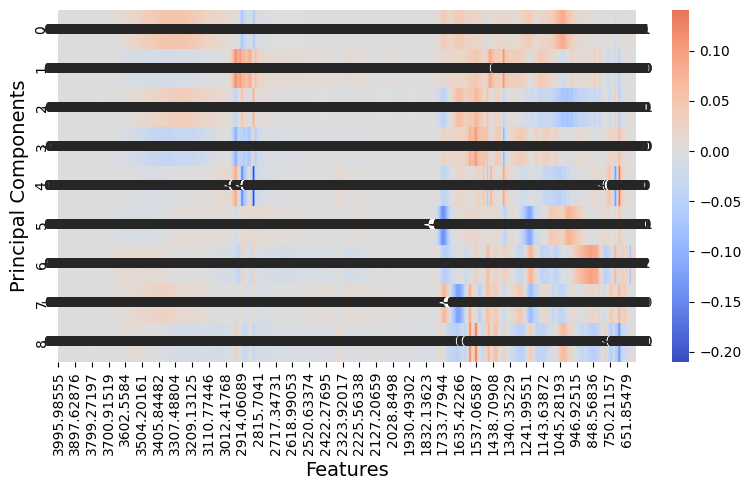

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(pca_components_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
#plt.title('PCA Component Loadings (Heatmap)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Principal Components', fontsize=14)
plt.tight_layout()
plt.savefig('KData_Heatmap_pca.tiff', dpi=300, bbox_inches='tight')
plt.show()


In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)
pca = PCA(n_components=20)
data_pca = pca.fit_transform(data_scaled)


# Check how much variance each component explains
print("Explained Variance Ratio of each principal component:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio of each principal component:
[0.43904799 0.18681138 0.09314351 0.07201679 0.05131966 0.04641061
 0.02171613 0.01427455 0.01371616 0.00864042 0.00686087 0.00653064
 0.00504994 0.00463871 0.00367399 0.00331662 0.00250272 0.00217219
 0.00189705 0.00166723]


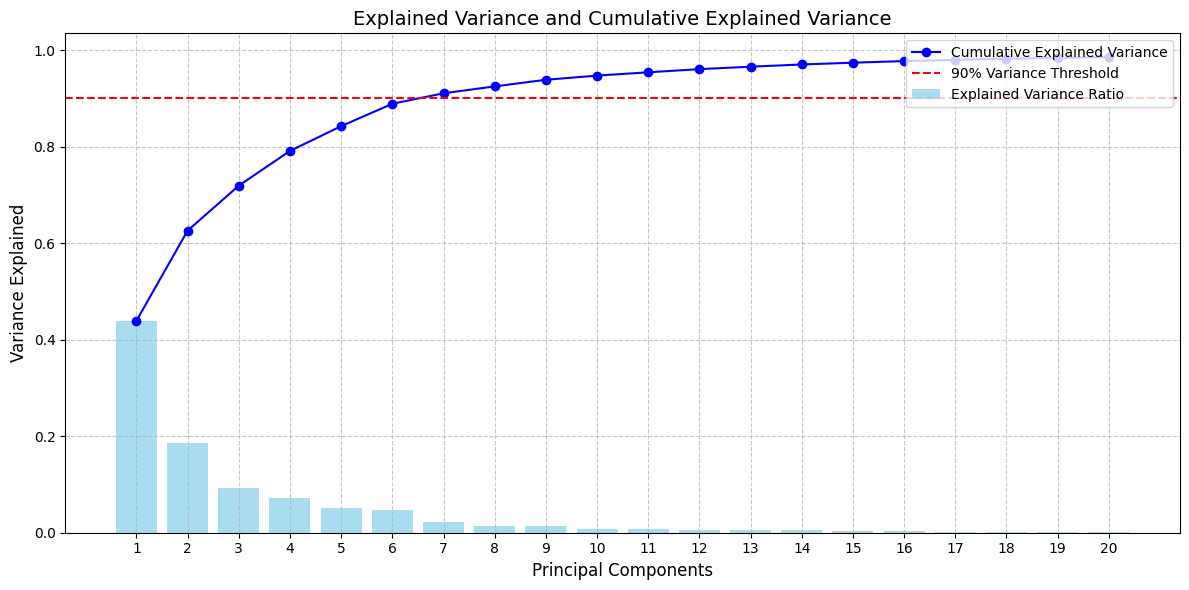

In [13]:
explained_variance_ratio = np.array([
    0.43904799, 0.18681138, 0.09314351, 0.07201679, 0.05131966, 0.04641061,
    0.02171613, 0.01427455, 0.01371616, 0.00864042, 0.00686087, 0.00653064,
    0.00504994, 0.00463871, 0.00367399, 0.00331662, 0.00250272, 0.00217219,
    0.00189705, 0.00166723
])
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(12, 6))

# Explained Variance Ratio (Bar Plot)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance Ratio', color='skyblue')

# Cumulative Explained Variance (Line Plot)
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    color='blue',
    label='Cumulative Explained Variance',
    linestyle='-',
    markersize=6
)

# Add threshold line at 90% variance
plt.axhline(y=0.9, color='red', linestyle='--', label='90% Variance Threshold')

# Customizing the plot
plt.title('Explained Variance and Cumulative Explained Variance', fontsize=14)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Variance Explained', fontsize=12)
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure integer ticks
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

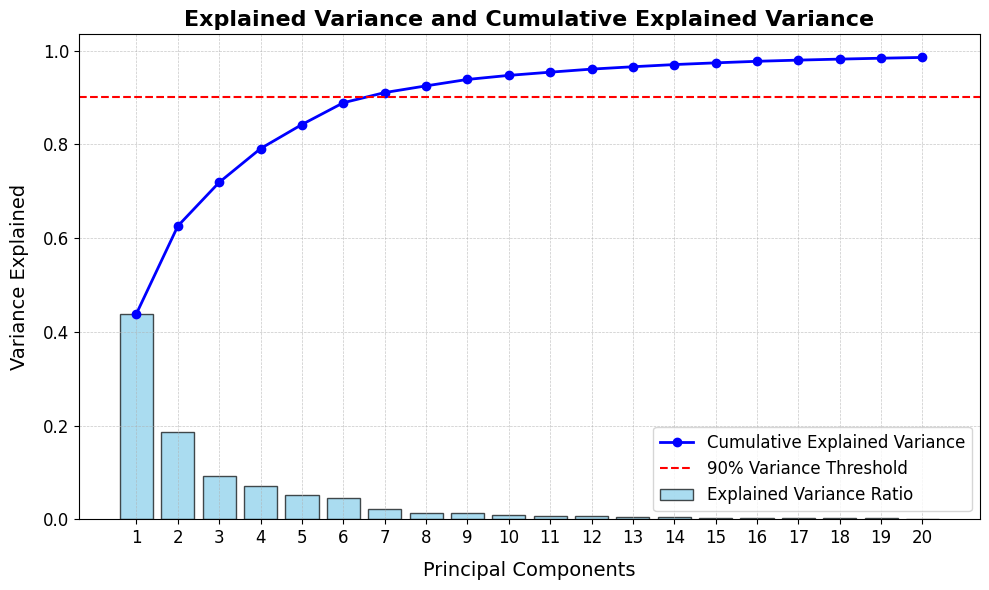

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Provided Explained Variance Ratio
explained_variance_ratio = np.array([
    0.43904799, 0.18681138, 0.09314351, 0.07201679, 0.05131966, 0.04641061,
    0.02171613, 0.01427455, 0.01371616, 0.00864042, 0.00686087, 0.00653064,
    0.00504994, 0.00463871, 0.00367399, 0.00331662, 0.00250272, 0.00217219,
    0.00189705, 0.00166723
])

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# High-Impact Plot Styling
plt.figure(figsize=(10, 6))

# Bar plot for Explained Variance Ratio
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    label='Explained Variance Ratio'
)

# Line plot for Cumulative Explained Variance
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=6,
    label='Cumulative Explained Variance'
)

# Add threshold line at 90% variance
plt.axhline(y=0.9, color='red', linestyle='--', linewidth=1.5, label='90% Variance Threshold')

# Customization for High-Impact Papers
plt.title('Explained Variance and Cumulative Explained Variance', fontsize=16, weight='bold')
plt.xlabel('Principal Components', fontsize=14, labelpad=10)
plt.ylabel('Variance Explained', fontsize=14, labelpad=10)
plt.xticks(
    ticks=range(1, len(explained_variance_ratio) + 1),
    labels=[str(i) for i in range(1, len(explained_variance_ratio) + 1)],
    fontsize=12
)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='best')
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure for publication
plt.savefig('pca_explained_variance_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


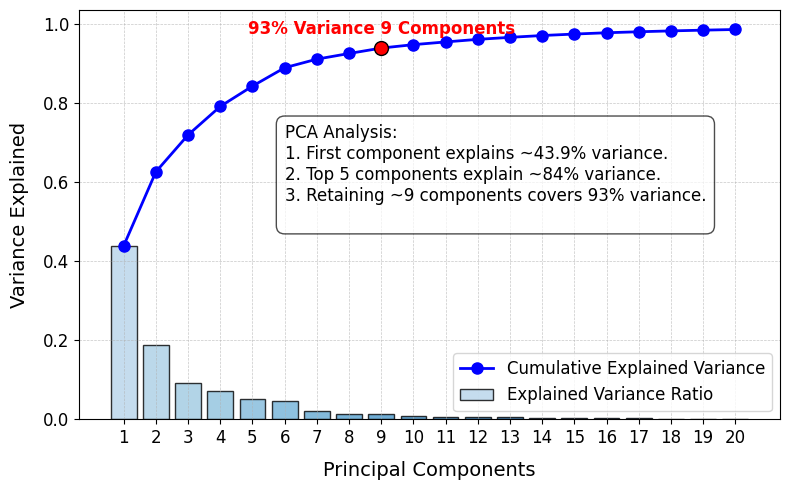

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Provided Explained Variance Ratio
explained_variance_ratio = np.array([
    0.43904799, 0.18681138, 0.09314351, 0.07201679, 0.05131966, 0.04641061,
    0.02171613, 0.01427455, 0.01371616, 0.00864042, 0.00686087, 0.00653064,
    0.00504994, 0.00463871, 0.00367399, 0.00331662, 0.00250272, 0.00217219,
    0.00189705, 0.00166723
])

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Components needed to reach 99% variance
components_to_99 = np.argmax(cumulative_variance >= 0.93) + 1

# Figure and axis setup
plt.figure(figsize=(8, 5))

# Bar plot for Explained Variance Ratio
bars = plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    color=plt.cm.Blues(np.linspace(0.3, 1, len(explained_variance_ratio))),
    edgecolor='black',
    alpha=0.8,
    label='Explained Variance Ratio'
)

# Line plot for Cumulative Explained Variance
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8,
    label='Cumulative Explained Variance'
)


plt.text(
    components_to_99, 0.965, f"93% Variance {components_to_99} Components",
    color='red', fontsize=12, fontweight='bold', ha='center', va='bottom'
)

# Highlight the 99% variance point on the curve
plt.scatter(
    components_to_99, cumulative_variance[components_to_99 - 1],
    color='red', edgecolor='black', s=100, zorder=5
)

# Add descriptive text about the data
plt.text(
    6, 0.5,
    ("PCA Analysis:\n"
     "1. First component explains ~43.9% variance.\n"
     "2. Top 5 components explain ~84% variance.\n"
     "3. Retaining ~9 components covers 93% variance.\n"
     ),
    fontsize=12, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5')
)

'''
plt.title(
    'Explained Variance and Cumulative Explained Variance in PCA',
    fontsize=18, weight='bold', pad=20
)
'''
plt.xlabel('Principal Components', fontsize=14, labelpad=10)
plt.ylabel('Variance Explained', fontsize=14, labelpad=10)
plt.xticks(
    ticks=range(1, len(explained_variance_ratio) + 1),
    labels=[str(i) for i in range(1, len(explained_variance_ratio) + 1)],
    fontsize=12
)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure for publication
plt.savefig('Kpca_explain_99.tiff', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


## Jung

In [2]:
Jung = pd.read_csv("/home/kumail/Energy_AI/Micro Palstic/Dataset/Jung et Dataset.csv")
Jung = Jung.drop(columns=['Turtle_piece.scan'])
Jung

,identified,4000,3999,3998,3997,3996,3995,3994,3993,3992,...,459,458,457,456,455,454,453,452,451,450
0,HDPE,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,99.50,...,96.83,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44
1,PP,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,99.02,...,93.80,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36
2,PP,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,99.21,...,93.98,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87
3,Mixture,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,99.51,...,96.41,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80
4,HDPE,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,99.56,...,95.28,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,PP,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,99.73,...,98.58,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98
796,Mixture,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,99.63,...,97.02,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47
797,Mixture,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,99.93,...,96.94,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02
798,HDPE,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.57,...,94.32,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31


In [3]:
Jung_counts = Jung['identified'].value_counts()
Jung_counts

identified
HDPE       438
PP         272
Mixture     39
LDPE        37
PS           7
Unknown      4
Nylon        1
PVC          1
PETE         1
Name: count, dtype: int64

In [4]:
values_to_remove = ['Nylon', 'PVC', 'PETE']
Jung = Jung[~Jung['identified'].isin(values_to_remove)]
Jung['identified'] = Jung['identified'].replace('PS', 'Unknown')
Jung_counts = Jung['identified'].value_counts()
Jung_counts


/tmp/ipykernel_27415/3446870954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jung['identified'] = Jung['identified'].replace('PS', 'Unknown')


identified
HDPE       438
PP         272
Mixture     39
LDPE        37
Unknown     11
Name: count, dtype: int64

In [5]:
label_encoder = LabelEncoder()
Jung['identified_encoded'] = label_encoder.fit_transform(Jung['identified'])
Jung = Jung.drop(columns=['identified'])
Jung

/tmp/ipykernel_27415/1861818555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jung['identified_encoded'] = label_encoder.fit_transform(Jung['identified'])


,4000,3999,3998,3997,3996,3995,3994,3993,3992,3991,...,458,457,456,455,454,453,452,451,450,identified_encoded
0,99.51,99.51,99.51,99.51,99.51,99.50,99.50,99.50,99.50,99.51,...,96.84,96.85,96.83,96.77,96.66,96.54,96.46,96.43,96.44,0
1,99.03,99.03,99.03,99.03,99.02,99.02,99.02,99.02,99.02,99.02,...,93.77,93.86,94.01,94.09,94.09,94.08,94.12,94.23,94.36,3
2,99.23,99.22,99.22,99.21,99.21,99.20,99.20,99.21,99.21,99.22,...,94.00,94.05,94.09,94.14,94.23,94.38,94.57,94.75,94.87,3
3,99.50,99.50,99.50,99.50,99.51,99.51,99.51,99.51,99.51,99.51,...,96.45,96.50,96.55,96.62,96.68,96.74,96.77,96.78,96.80,2
4,99.55,99.56,99.56,99.57,99.57,99.57,99.56,99.56,99.56,99.56,...,95.22,95.23,95.30,95.38,95.41,95.35,95.24,95.21,95.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,99.75,99.75,99.75,99.75,99.75,99.75,99.74,99.74,99.73,99.73,...,98.58,98.65,98.76,98.85,98.88,98.87,98.87,98.92,98.98,3
796,99.62,99.62,99.62,99.63,99.63,99.63,99.63,99.63,99.63,99.64,...,97.08,97.16,97.23,97.27,97.30,97.32,97.34,97.39,97.47,2
797,99.92,99.92,99.92,99.92,99.92,99.92,99.92,99.93,99.93,99.93,...,97.01,97.05,97.07,97.08,97.06,97.01,96.97,96.97,97.02,2
798,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.58,99.57,99.57,...,94.38,94.46,94.51,94.52,94.52,94.53,94.51,94.42,94.31,0


In [6]:
X = Jung.drop(columns=['identified_encoded'])
Y = Jung['identified_encoded']

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
normalizer = Normalizer(norm='max')
data_scaled = normalizer.fit_transform(X)
pca = PCA(n_components=9)
data_pca = pca.fit_transform(data_scaled)


# Check how much variance each component explains
print("Explained Variance Ratio of each principal component:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio of each principal component:
[0.49899195 0.282692   0.10894243 0.05868484 0.02262672 0.00786886
 0.00572934 0.00241824 0.00206183]


In [21]:
pca_components = pca.components_
pca_components_df = pd.DataFrame(pca_components, columns=X.columns)
print("\nPCA Component Loadings:")
pca_components_df
important_features = pca_components_df.abs().idxmax(axis=1)

print("\nMost important features for each principal component:")
print(important_features)


PCA Component Loadings:

Most important features for each principal component:
0    2916
1    2848
2    1376
3    1376
4     696
5    1651
6     696
7     716
8     718
dtype: object


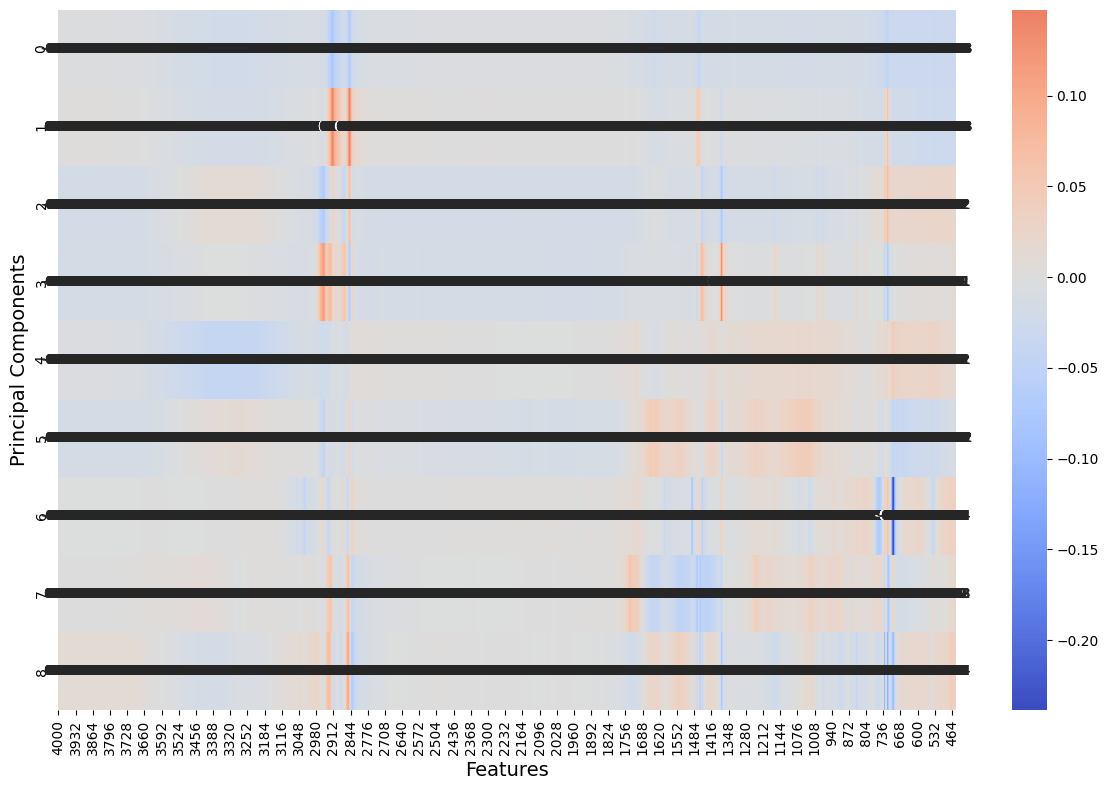

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(pca_components_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
#plt.title('PCA Component Loadings (Heatmap)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Principal Components', fontsize=14)
plt.tight_layout()
plt.savefig('JData_Heatmap_pca.tiff', dpi=300, bbox_inches='tight')
plt.show()

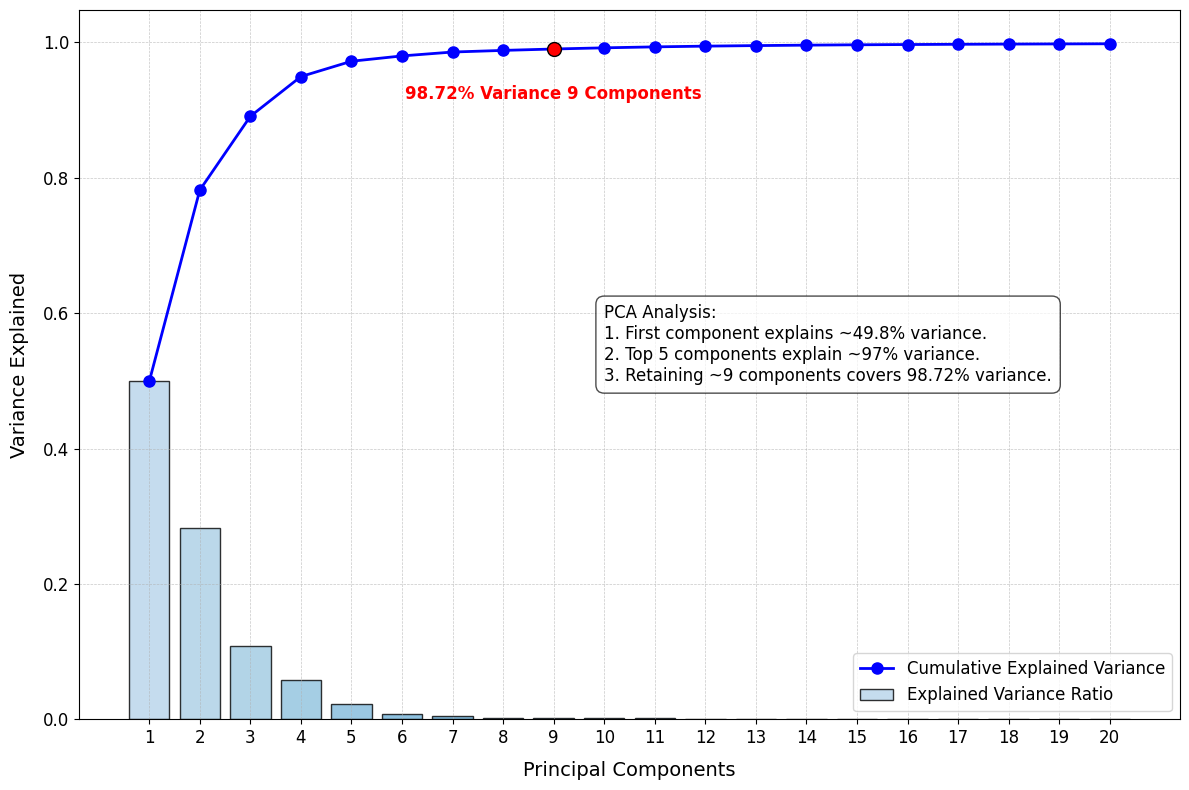

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Provided Explained Variance Ratio
explained_variance_ratio = np.array([
    0.49899195, 0.28269201, 0.10894243, 0.05868484, 0.02262672, 0.00786886,
    0.00572934, 0.00241824, 0.00206183, 0.00172665, 0.00141934, 0.00109028,
    0.00079612, 0.00065688, 0.00052845, 0.00038051, 0.00034930, 0.00029737,
    0.00024286, 0.00022480
])

cumulative_variance = np.cumsum(explained_variance_ratio)

components_to_90 = np.argmax(cumulative_variance >= 0.99) + 1

# Figure and axis setup
plt.figure(figsize=(12, 8))

# Bar plot for Explained Variance Ratio
bars = plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    color=plt.cm.Blues(np.linspace(0.3, 1, len(explained_variance_ratio))),
    edgecolor='black',
    alpha=0.8,
    label='Explained Variance Ratio'
)

# Line plot for Cumulative Explained Variance
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8,
    label='Cumulative Explained Variance'
)


plt.text(
    components_to_90, 0.91, f"98.72% Variance {components_to_90} Components",
    color='red', fontsize=12, fontweight='bold', ha='center', va='bottom'
)

# Highlight the 90% variance point on the curve
plt.scatter(
    components_to_90, cumulative_variance[components_to_90 - 1],
    color='red', edgecolor='black', s=100, zorder=5
)

# Add descriptive text about the data
plt.text(
    10, 0.5,
    ("PCA Analysis:\n"
     "1. First component explains ~49.8% variance.\n"
     "2. Top 5 components explain ~97% variance.\n"
     "3. Retaining ~9 components covers 98.72% variance."),
    fontsize=12, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5')
)
'''
# Customization for High-Impact Papers
plt.title(
    'Explained Variance and Cumulative Explained Variance in PCA',
    fontsize=18, weight='bold', pad=20
)
plt.suptitle(
    'Principal Component Analysis (PCA) for Dimensionality Reduction in ML Models',
    fontsize=14, style='italic'
)
'''
plt.xlabel('Principal Components', fontsize=14, labelpad=10)
plt.ylabel('Variance Explained', fontsize=14, labelpad=10)
plt.xticks(
    ticks=range(1, len(explained_variance_ratio) + 1),
    labels=[str(i) for i in range(1, len(explained_variance_ratio) + 1)],
    fontsize=12
)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='lower right')
plt.grid(which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure for publication
plt.savefig('Jpca_explained_variance_enhanced.tiff', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()